In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
citibikes_2018_spring_file = "JC-201804-citibike-tripdata.csv"
citibikes_2018_summer_file = "JC-201808-citibike-tripdata.csv"
citibikes_2018_winter_file = "JC-201812-citibike-tripdata.csv"
citibikes_2019_spring_file = "JC-201903-citibike-tripdata.csv"

citibikes_2018_spring_df = pd.read_csv(citibikes_2018_spring_file)
citibikes_2018_summer_df = pd.read_csv(citibikes_2018_summer_file)
citibikes_2018_winter_df = pd.read_csv(citibikes_2018_winter_file)
citibikes_2019_spring_df = pd.read_csv(citibikes_2019_spring_file)

citibikes_2018_spring_summer_df = citibikes_2018_spring_df.append(citibikes_2018_summer_df)
citibikes_2018_spring_summer_winter_df = citibikes_2018_spring_summer_df.append(citibikes_2018_winter_df)
citibikes_2018_2019_spring_df = citibikes_2018_spring_df.append(citibikes_2019_spring_df)
bikes_info_df = citibikes_2018_2019_spring_df.append(citibikes_2018_spring_summer_winter_df)
#citibikes_2018_2019_spring_df.head()
#citibikes_2018_spring_summer_winter_df.head()
#bikes_info_df
bikes_info = bikes_info_df.drop(columns= ["start station id", 'start station name', 'end station id', 'end station name', 'bikeid'])
#bikes_info.head()
bikes_info_clean = bikes_info.dropna(axis=0)
#bikes_info_clean.head()
bikes_info_clean.to_csv('bikes_info_clean.csv')


In [3]:
bikes_info_clean.info

<bound method DataFrame.info of        tripduration                 starttime                  stoptime  \
0              1814  2018-04-01 09:43:51.1590  2018-04-01 10:14:06.1300   
1               298  2018-04-01 11:42:53.7090  2018-04-01 11:47:51.8770   
2              1060  2018-04-01 12:43:11.9640  2018-04-01 13:00:52.8700   
3              1035  2018-04-01 12:43:40.5890  2018-04-01 13:00:55.6620   
4               559  2018-04-01 12:56:47.4600  2018-04-01 13:06:06.7710   
5               232  2018-04-01 15:29:47.3040  2018-04-01 15:33:39.3650   
6               149  2018-04-01 15:43:48.2360  2018-04-01 15:46:17.2380   
7              1024  2018-04-01 15:48:56.7600  2018-04-01 16:06:01.4630   
8               882  2018-04-01 16:21:50.3390  2018-04-01 16:36:32.4390   
9               676  2018-04-01 16:46:24.8250  2018-04-01 16:57:41.3880   
10              605  2018-04-01 16:47:47.5510  2018-04-01 16:57:53.5100   
11              337  2018-04-01 19:42:28.2020  2018-04-01 19:48:05.5

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


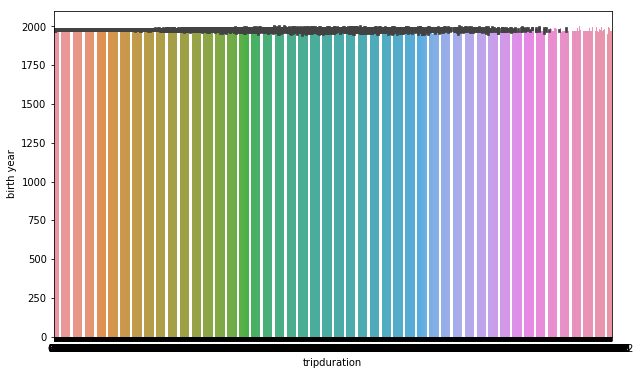

In [4]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'tripduration', y = 'birth year', data = bikes_info_clean)

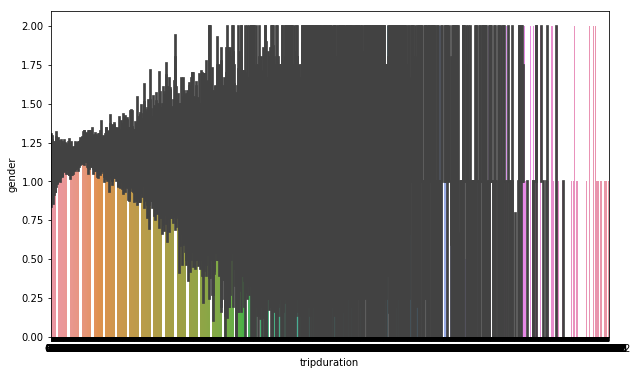

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'tripduration', y = 'gender', data = bikes_info_clean)

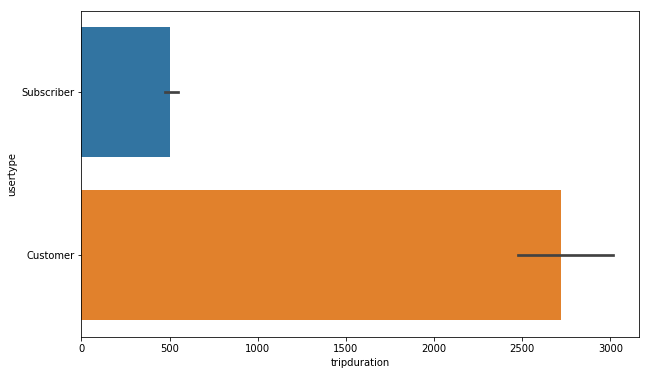

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'tripduration', y = 'usertype', data = bikes_info_clean)

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'tripduration', y = 'starttime', data = bikes_info_clean)

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'gender', y = 'starttime', data = bikes_info_clean)

In [ ]:
#Making binary classificaion for the response variable.
#Dividing birth year as under20,30,40,....,80, over 80 and bad by giving the limit for the quality
bins = (20, 30, 40,50,60,70,80,150)
group_names = ['Under 20', '30s', '40s','50s', '60s','70s', '80s', 'Over 80']
bikes_info_clean['birth year'] = pd.cut(bikes_info_clean['birth year'], bins = bins, labels = group_names)

In [ ]:
#assign a labels to our quality variable
label_quality = LabelEncoder()

In [ ]:
#Bad becomes 0 and good becomes 1 
bikes_info_clean['birth year'] = label_quality.fit_transform(bikes_info_clean['birth year'])

In [ ]:
bikes_info_clean['birth year'].value_counts()

In [ ]:
sns.countplot(bikes_info_clean['birth year'])

In [ ]:
#Now seperate the dataset as response variable and feature variabes
X = bikes_info_clean.drop('birth year', axis = 1)
y = bikes_info_clean['birth year']

In [ ]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
#see how our model performed
print(classification_report(y_test, pred_rfc))

In [ ]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

In [ ]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_sgd))

In [ ]:
print(confusion_matrix(y_test, pred_sgd))

Support Vector Classifier


In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_svc))

to increase our accuracy of models
Grid Search CV

In [ ]:
#Finding best parameters for our SVC model =========> NEEDS TWEEKING
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(X_train, y_train)

In [ ]:
#Best parameters for our svc model
grid_svc.best_params_

In [ ]:
#run  SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

Cross Validation Score for random forest and SGD

In [ ]:
#Evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()